In [81]:
pip install pulp

Note: you may need to restart the kernel to use updated packages.


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pulp

from scipy import stats
#import statsmodels.api as sm
from scipy.interpolate import CubicSpline

# Import data

In [83]:
demand = pd.read_csv('demands.csv')
demand.head()

,Year,Region,Demand
0,2013,Downtown Toronto,249581
1,2013,East York,172730
2,2013,Etobicoke,285764
3,2013,Mississauga East,255427
4,2013,North Toronto,263276


In [84]:
center = pd.read_csv('centers.csv')
center

,Center,Opening Costs,Operating Costs,Num MPs,Maximum capacity
0,Center A,0,275000,215,5000000
1,Center B,0,275000,125,5000000
2,Center C,0,275000,100,5000000
3,Center D,0,285000,120,5000000
4,Center E,250000,125000,0,5000000
5,Center F,100000,175000,0,5000000


In [85]:
distance = pd.read_csv('distances.csv')
distance.head()

,Center,Region,Distance
0,Center A,Downtown Toronto,25.77
1,Center A,East York,2.24
2,Center A,Etobicoke,25.72
3,Center A,Mississauga East,28.65
4,Center A,North Toronto,11.64


# Plot and forecast demand

In [86]:
grouped_data = demand.groupby(['Region', 'Year']).sum()
grouped_data

Demand
Region           Year        
Downtown Toronto 2013  249581
                 2014  262099
                 2015  275303
                 2016  288823
                 2017  302692
...                       ...
Scarborough East 2018  357786
                 2019  375518
                 2020  393824
                 2021  413821
                 2022  433845

[70 rows x 1 columns]

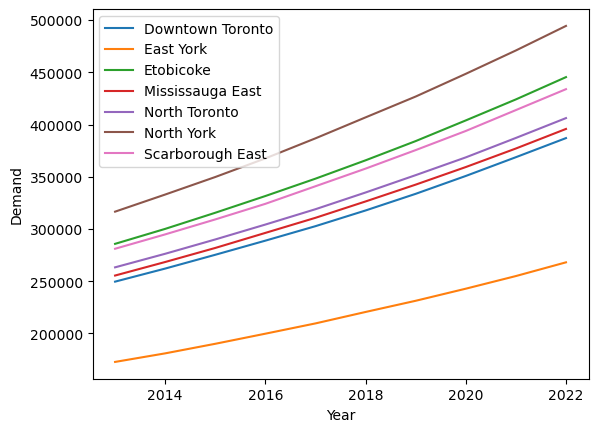

In [87]:
regions = demand['Region'].unique()

for region in regions:
    data = grouped_data.loc[region]
    plt.plot(data.index, data['Demand'], label=region)

plt.legend()
plt.xlabel('Year')
plt.ylabel('Demand')
plt.show()

In [88]:
# Group the data by region and create a cubic spline function for each region:

spline_functions = {}

for region in regions:
    region_data_subset = demand[demand['Region'] == region]
    x = region_data_subset['Year']
    y = region_data_subset['Demand']
    spline_functions[region] = CubicSpline(x, y)

In [89]:
# Define a function to generate the forecast for a given region using the cubic spline function:

def generate_forecast(region, spline_model):
    future_years = pd.date_range(start='2023', end='2026', freq='Y').year
    forecast_demand = spline_model(future_years)
    forecast_df = pd.DataFrame({'Year': future_years, 'Demand': forecast_demand})
    forecast_df['Region'] = region
    
# Interpolate demand values for each year
    
    region_data_subset = demand[demand['Region'] == region]
    x = region_data_subset['Year'].tolist() + future_years.tolist()
    y = region_data_subset['Demand'].tolist() + forecast_demand.tolist()
    interp_func = CubicSpline(x, y)
    forecast_df['Demand'] = interp_func(forecast_df['Year'])
    
    return forecast_df

In [90]:
forecast_data = pd.DataFrame()

for region in regions:
    spline_model = spline_functions[region]
    forecast_df = generate_forecast(region, spline_model)
    forecast_data = forecast_data.append(forecast_df)

/tmp/ipykernel_147/3467294423.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_data = forecast_data.append(forecast_df)
/tmp/ipykernel_147/3467294423.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_data = forecast_data.append(forecast_df)
/tmp/ipykernel_147/3467294423.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_data = forecast_data.append(forecast_df)
/tmp/ipykernel_147/3467294423.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_data = forecast_data.append(forecast_df)
/tmp/ipykernel_147/3467294423.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pa

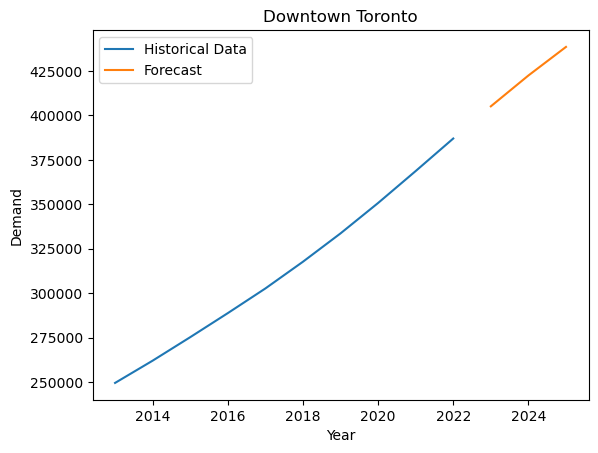

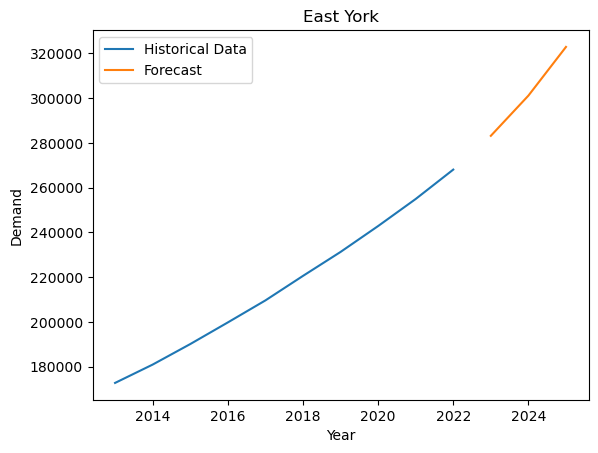

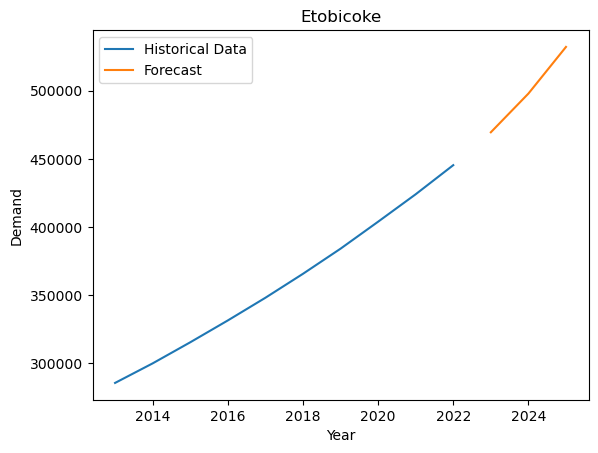

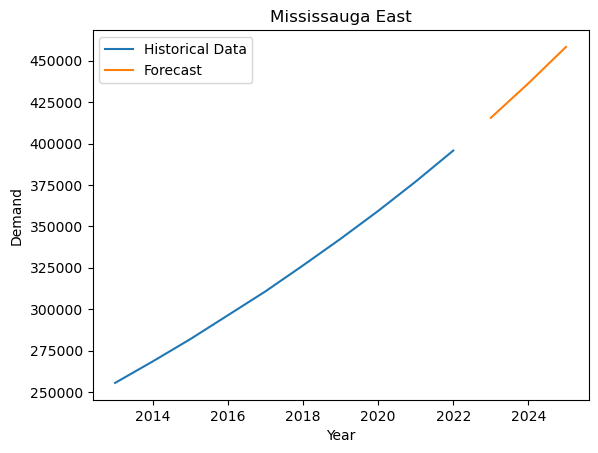

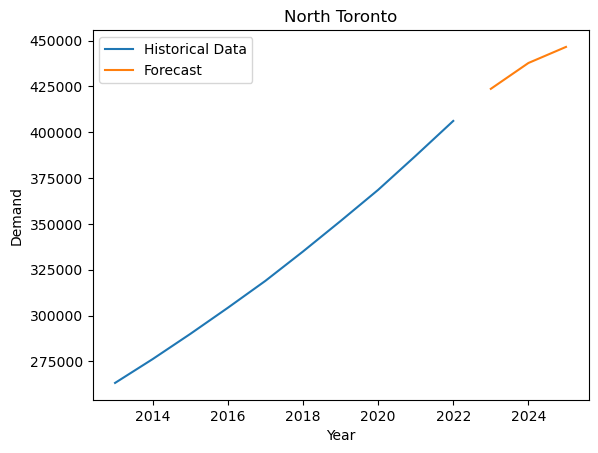

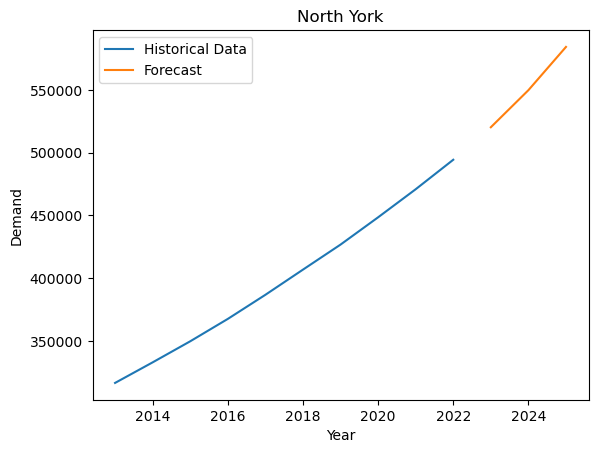

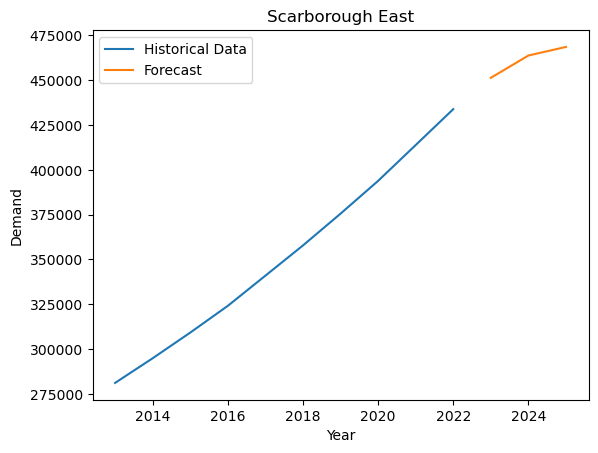

In [137]:
for region in regions:
    region_data_subset = demand[demand['Region'] == region]
    forecast_data_subset = forecast_data[forecast_data['Region'] == region]
    
    plt.plot(region_data_subset['Year'], region_data_subset['Demand'], label='Historical Data')
    plt.plot(forecast_data_subset['Year'], forecast_data_subset['Demand'], label='Forecast')
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Demand')
    plt.title(region)
    plt.show()

In [91]:
forecast_data

,Year,Demand,Region
0,2023,405091.086912,Downtown Toronto
1,2024,422435.347647,Downtown Toronto
2,2025,438496.869117,Downtown Toronto
0,2023,283162.783580,East York
1,2024,301132.134318,East York
2,2025,322892.835795,East York
0,2023,469456.859155,Etobicoke
1,2024,497831.436620,Etobicoke
2,2025,532025.591549,Etobicoke
0,2023,415534.268293,Mississauga East


In [92]:
forecast_data_new = forecast_data.reset_index(drop=True)
forecast_data_new = forecast_data_new[['Region','Demand','Year']]
forecast_data_new

,Region,Demand,Year
0,Downtown Toronto,405091.086912,2023
1,Downtown Toronto,422435.347647,2024
2,Downtown Toronto,438496.869117,2025
3,East York,283162.783580,2023
4,East York,301132.134318,2024
5,East York,322892.835795,2025
6,Etobicoke,469456.859155,2023
7,Etobicoke,497831.436620,2024
8,Etobicoke,532025.591549,2025
9,Mississauga East,415534.268293,2023


# Visualization

### Total demand by regions

In [93]:
grouped_df_1 = demand.groupby('Region')

In [94]:
total_demand = grouped_df_1['Demand'].sum()

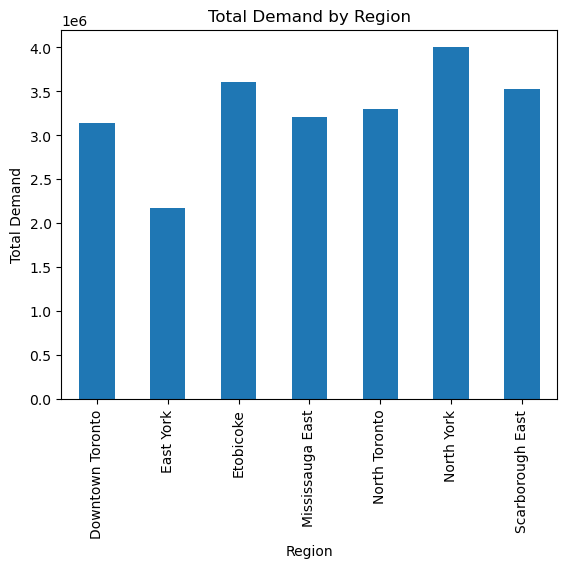

In [95]:
total_demand.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Total Demand')
plt.title('Total Demand by Region')
plt.show()

### Total demand by years

In [96]:
grouped_df_1 = demand.groupby('Year')

In [97]:
total_demand = grouped_df_1['Demand'].sum()

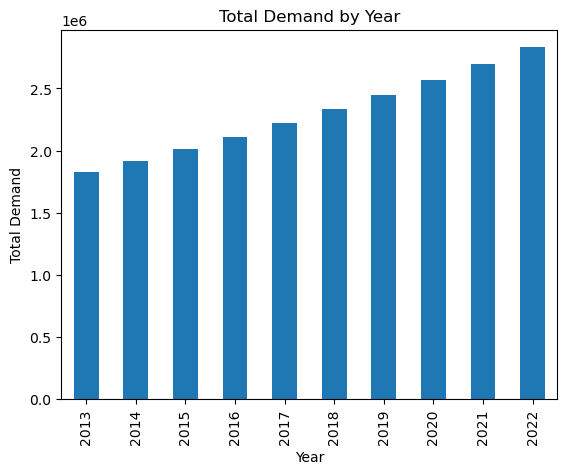

In [98]:
total_demand.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Demand')
plt.title('Total Demand by Year')
plt.show()

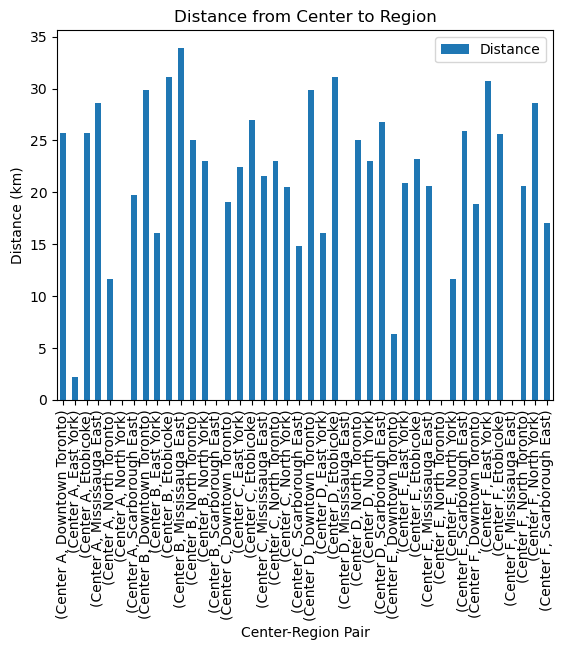

In [99]:
fig, ax = plt.subplots()
distance_mean = distance.groupby(['Center', 'Region']).mean()
distance_mean.plot(kind='bar', ax=ax)
ax.set_xlabel('Center-Region Pair')
ax.set_ylabel('Distance (km)')
ax.set_title('Distance from Center to Region')

plt.show()

# Case solution

### Sets

In [100]:
# Centers
centers = list(center["Center"].unique())
numcenters = len(centers)

# Demand regions
regions = list(forecast_data_new["Region"].unique())
numregions = len(regions)

# Years
years = list(forecast_data_new["Year"].unique())
numyears = len(years)

In [101]:
centers

['Center A', 'Center B', 'Center C', 'Center D', 'Center E', 'Center F']

### Parameters

In [102]:
# Djt: Demand in each regions in each year (dictionary)
regiondemand = {}
for j in regions:
    for t in years:
        regiondemand[(j,t)] = float(forecast_data_new[(forecast_data_new["Region"] == j)&(forecast_data_new["Year"] == t)]["Demand"])

# Ki: Center capacities (dictionary)
centercapacity = {}
for i in centers:
    centercapacity[i] = int(center[(center["Center"] == i)]["Maximum capacity"])

# oi: Center openning costs (dictionary)
centeropencost = {}
for i in centers:
    centeropencost[i] = float(center[(center["Center"] == i)]["Opening Costs"])

# fi: Center operating costs (dictionary)
centeroperatecost = {}
for i in centers:
    centeroperatecost[i] = float(center[(center["Center"] == i)]["Operating Costs"])

# dij: Distance (dictionary)
distancedic = {}
for i in centers:
    for j in regions:
        distancedic[(i,j)] = distance[(distance["Center"] == i)&(distance["Region"] == j)]["Distance"]   

# Labor cost (dictionary)
labor_cost_2023 = 37.85
labor_cost_2024 = labor_cost_2023 * (1 + 0.025)
labor_cost_2025 = labor_cost_2024 * (1 + 0.025)
laborcost = {
    2023:labor_cost_2023,
    2024:labor_cost_2024,
    2025:labor_cost_2025
} 
    
# cijt: Travelcosts (dictionary)
travelcost = {}
for i in centers:
    for j in regions:
        for t in years:
            travelcost[(i,j,t)] = (distance[(distance["Center"] == i)&(distance["Region"] == j)]["Distance"])*0.25+laborcost[t]

# Number of workers in each center in 2022
centerworkers = {}
for i in centers:
    centerworkers[i] = int(center[(center["Center"] == i)]["Num MPs"])

In [103]:
centerworkers

{'Center A': 215,
 'Center B': 125,
 'Center C': 100,
 'Center D': 120,
 'Center E': 0,
 'Center F': 0}

### Variables

In [104]:
# Variables: if a center is operated on year t
yvar = pulp.LpVariable.dict("y", (centers, years), cat=pulp.LpBinary)

# Variables: if a center is opened on year t
zvar = pulp.LpVariable.dict("z", (centers, years), cat=pulp.LpBinary)

# Variables: if a center is opened status for year t
#vvar = pulp.LpVariable.dict("v", (centers, years), cat=pulp.LpBinary)

# Variables: amount of demand from each region allocated to center, per scenario
xvar = pulp.LpVariable.dict("x", (centers, regions, years), lowBound=0.0, cat=pulp.LpContinuous)

# Variables: number of workers hired for each centre each year
hvar = pulp.LpVariable.dict("h", (centers, years), lowBound=0.0, upBound=300, cat=pulp.LpInteger)

# Variable: the number of workers for each center at the end of each year
wvar = pulp.LpVariable.dict('w',(centers, years),lowBound = 0.0, cat=pulp.LpInteger)

## Scenario 1: ComfortHealth can reject patients and already opened center A,B,C,D has to operate in the next three years

### Model Initialization

In [105]:
# Initialize model and objective sense
locationModel_1 = pulp.LpProblem(name="LocationModel_1", sense=pulp.LpMaximize)

### Constraints

In [106]:
# Contraint: supplied hours should be less or equal to demand hours
for j in regions:
    for t in years:
        locationModel_1 += pulp.lpSum( [xvar[(i,j,t)] for i in centers] ) <= regiondemand[j,t]

# Constraint: center capacities must be observed in all scenarios
for i in centers:
    for t in years:
        locationModel_1 += pulp.lpSum( [xvar[(i,j,t)] for j in regions] ) <= centercapacity[i] * yvar[i,t]
        
# Constraint: first 4 centers already opened
#for t in years:
#    locationModel += pulp.lpSum( vvar[i,t] for i in [0,1,2,3] ) == 4
    
# Constraint: each center can only be opened once
#for i in centers:
#    for t in years[1:]:
#        locationModel += vvar[(i,t)] == vvar[(i,t-1)] + zvar[(i,t)]
#        status = (vvar[(i,t-1)] if t > 0 else 0) + zvar[(i,t)]
#        locationModel += (vvar[(i,t)] == status)

# Constraint: only center E,F can be decided open or not in year 2023
for t in years:
    locationModel_1 += pulp.lpSum( zvar[i,t]  for i in ['Center A', 'Center B', 'Center C', 'Center D'] ) == 0
#    if i in ['Center A', 'Center B', 'Center C', 'Center D']:
#        locationModel_1 += pulp.lpSum( zvar[i,t] ) == 0
for i in centers:
    locationModel_1 += pulp.lpSum( zvar[i,t] for t in [2024, 2025] ) == 0
#    if t in [2024, 2025]:
#        locationModel_1 += pulp.lpSum( zvar[i,t] ) == 0    

# Constraint: center A,B,C,D is already opened and has to operate in the next three years
for t in years:
    locationModel_1 += pulp.lpSum( yvar[i,t] for i in ['Center A', 'Center B', 'Center C', 'Center D'] ) == 4
#    if i in ['Center A', 'Center B', 'Center C', 'Center D']:
#        locationModel_1 += pulp.lpSum( yvar[i,t] ) == 4        

# Constraint: newly opened centers must be at least operate for 1 year
for t in years:
    if zvar[i,t] == 1:
        locationModel_1 += pulp.lpSum( yvar[i,t] for i in ['Center E', 'Center F'] ) >= 1
        
# Constraint: worker capacities must be observed in all scenarios
for i in centers:
    for t in years:
        locationModel_1 += pulp.lpSum( [xvar[(i,j,t)] for j in regions] ) <= 6*250* wvar[i,t]
        
# Constraint: the number of works in total for this year equals to last year's worker + this year's new hire
# Only for workers in 2022, you are free to reallocate these initial workers to any regions as deemed necessary
locationModel_1 += pulp.lpSum([wvar[(i,2023)]]for i in centers) <= center['Num MPs'].sum() + pulp.lpSum([hvar[(i,2023)]] for i in centers )
locationModel_1 += pulp.lpSum([wvar[(i,2023)]]for i in centers) >= center['Num MPs'].sum()

for i in centers:
    for t in years[1:]:
        locationModel_1 += wvar[(i,t)] == wvar[(i,t-1)] + hvar[(i,t)] 

### Objective Function

In [107]:
# --- center opening costs
obj = -pulp.lpSum([ centeropencost[i] * zvar[i,t] for i in centers for t in years])

# --- center operating costs
obj += -pulp.lpSum([ centeroperatecost[i] * yvar[i,t] for i in centers for t in years])

# --- travel costs
obj += -pulp.lpSum( [ travelcost[(i,j,t)] * xvar[(i,j,t)] for i in centers for j in regions for t in years] )

# --- new hire costs
obj += -pulp.lpSum( hvar[i,t] for i in centers for t in years )*15000

# --- government reimbursement revenue
obj += pulp.lpSum( [xvar[(i,j,t)] for i in centers for j in regions for t in years] )*42

# add objective to model
locationModel_1 += obj

### Solution Process

In [108]:
# Solve model
locationModel_1.solve()
print("Status:", pulp.LpStatus[locationModel_1.status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/17a5355aff584cbab836a4bb9de4f963-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/17a5355aff584cbab836a4bb9de4f963-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 91 COLUMNS
At line 914 RHS
At line 1001 BOUNDS
At line 1074 ENDATA
Problem MODEL has 86 rows, 198 columns and 510 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 4.34858e+06 - 0.00 seconds
Cgl0002I 16 variables fixed
Cgl0003I 0 fixed, 0 tightened bounds, 5 strengthened rows, 0 substitutions
Cgl0004I processed model has 41 rows, 56 columns (28 integer (6 of which binary)) and 124 elements
Cbc0012I Integer solution of -4348454.2 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 seconds)
Cbc0038I Full problem 41 rows 56 colu

In [109]:
# Profit
profit = pulp.value(locationModel_1.objective)
print("Profit: " + str(profit))

Profit: 4348578.750000003


In [110]:
# Print solution 
for t in years:
    print("Year " + str(t))
    for i in centers:
        if yvar[i,t].varValue >= 1.0:
            print("Center " + str(i) + " is operated" + "\nNumber of worker allocated is "  + str(wvar[(i,t)].varValue) + " with number of new hires " + str(hvar[(i,t)].varValue))
            for j in regions:
                if xvar[(i,j,t)].varValue > 0.0:
                    print("\tServes region " + str(j) + " - with capacity " + str(xvar[(i,j,t)].varValue))

Year 2023
Center Center A is operated
Number of worker allocated is 346.0 with number of new hires 0.0
	Serves region North York - with capacity 519000.0
Center Center B is operated
Number of worker allocated is 0.0 with number of new hires 0.0
Center Center C is operated
Number of worker allocated is 0.0 with number of new hires 0.0
Center Center D is operated
Number of worker allocated is 214.0 with number of new hires 0.0
	Serves region Mississauga East - with capacity 321000.0
Center Center E is operated
Number of worker allocated is 0.0 with number of new hires 0.0
Year 2024
Center Center A is operated
Number of worker allocated is 346.0 with number of new hires 0.0
	Serves region North York - with capacity 519000.0
Center Center B is operated
Number of worker allocated is 0.0 with number of new hires 0.0
Center Center C is operated
Number of worker allocated is 0.0 with number of new hires 0.0
Center Center D is operated
Number of worker allocated is 214.0 with number of new hire

## Scenario 2: ComfortHealth can reject patients and already opened center A,B,C,D is optional to operate in the next three years

### Model Initialization

In [117]:
# Initialize model and objective sense
locationModel_2 = pulp.LpProblem(name="LocationModel_2", sense=pulp.LpMaximize)

### Constraints

In [123]:
# Contraint: supplied hours should be less or equal to demand hours
for j in regions:
    for t in years:
        locationModel_2 += pulp.lpSum( [xvar[(i,j,t)] for i in centers] ) <= regiondemand[j,t]

# Constraint: center capacities must be observed in all scenarios
for i in centers:
    for t in years:
        locationModel_2 += pulp.lpSum( [xvar[(i,j,t)] for j in regions] ) <= centercapacity[i] * yvar[i,t]
        
# Constraint: first 4 centers already opened
#for t in years:
#    locationModel += pulp.lpSum( vvar[i,t] for i in [0,1,2,3] ) == 4
    
# Constraint: each center can only be opened once
#for i in centers:
#    for t in years[1:]:
#        locationModel += vvar[(i,t)] == vvar[(i,t-1)] + zvar[(i,t)]
#        status = (vvar[(i,t-1)] if t > 0 else 0) + zvar[(i,t)]
#        locationModel += (vvar[(i,t)] == status)

# Constraint: only center E,F can be decided open or not in year 2023
for t in years:
    locationModel_2 += pulp.lpSum( zvar[i,t]  for i in ['Center A', 'Center B', 'Center C', 'Center D'] ) == 0
for i in centers:
    locationModel_2 += pulp.lpSum( zvar[i,t] for t in [2024, 2025] ) == 0    

# Constraint: center A,B,C,D is already opened and has to operate in the next three years
#for t in years:
# locationModel_1 += pulp.lpSum( yvar[i,t] for i in ['Center A', 'Center B', 'Center C', 'Center D'] ) == 4
        

# Constraint: newly opened centers must be at least operate for 1 year
for t in years:
    if zvar[i,t] == 1:
        locationModel_2 += pulp.lpSum( yvar[i,t] for i in ['Center E', 'Center F'] ) >= 1
        
# Constraint: worker capacities must be observed in all scenarios
for i in centers:
    for t in years:
        locationModel_2 += pulp.lpSum( [xvar[(i,j,t)] for j in regions] ) <= 6*250* wvar[i,t]
        
# Constraint: the number of works in total for this year equals to last year's worker + this year's new hire
# Only for workers in 2022, you are free to reallocate these initial workers to any regions as deemed necessary
locationModel_2 += pulp.lpSum([wvar[(i,2023)]]for i in centers) <= center['Num MPs'].sum() + pulp.lpSum([hvar[(i,2023)]] for i in centers )
locationModel_2 += pulp.lpSum([wvar[(i,2023)]]for i in centers) >= center['Num MPs'].sum()

for i in centers:
    for t in years[1:]:
        locationModel_2 += wvar[(i,t)] == wvar[(i,t-1)] + hvar[(i,t)] 

### Objective Function

In [125]:
# --- center opening costs
obj = -pulp.lpSum([ centeropencost[i] * zvar[i,t] for i in centers for t in years])

# --- center operating costs
obj += -pulp.lpSum([ centeroperatecost[i] * yvar[i,t] for i in centers for t in years])

# --- travel costs
obj += -pulp.lpSum( [ travelcost[(i,j,t)] * xvar[(i,j,t)] for i in centers for j in regions for t in years] )

# --- new hire costs
obj += -pulp.lpSum( hvar[i,t] for i in centers for t in years )*15000

# --- government reimbursement revenue
obj += pulp.lpSum( [xvar[(i,j,t)] for i in centers for j in regions for t in years] )*42

# add objective to model
locationModel_2 += obj

### Solution Process

In [126]:
# Solve model
locationModel_2.solve()
print("Status:", pulp.LpStatus[locationModel_2.status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/8f6d75aacdb94f9ab201cccd5ebcf855-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/8f6d75aacdb94f9ab201cccd5ebcf855-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 169 COLUMNS
At line 1460 RHS
At line 1625 BOUNDS
At line 1698 ENDATA
Problem MODEL has 164 rows, 198 columns and 978 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 7.66598e+06 - 0.00 seconds
Cgl0002I 16 variables fixed
Cgl0003I 0 fixed, 0 tightened bounds, 12 strengthened rows, 0 substitutions
Cgl0004I processed model has 49 rows, 64 columns (36 integer (16 of which binary)) and 150 elements
Cbc0038I Initial state - 14 integers unsatisfied sum - 4.34557
Cbc0038I Pass   1: suminf.    0.49141 (4) obj. -3.19313e+06 iterations 17
Cbc003

In [127]:
# Profit
profit = pulp.value(locationModel_2.objective)
print("Profit: " + str(profit))

Profit: 7152227.120885228


In [128]:
# Print solution 
for t in years:
    print("Year " + str(t))
    for i in centers:
        if yvar[i,t].varValue >= 1.0:
            print("Center " + str(i) + " is operated" + "\nNumber of worker allocated is "  + str(wvar[(i,t)].varValue) + " with number of new hires " + str(hvar[(i,t)].varValue))
            for j in regions:
                if xvar[(i,j,t)].varValue > 0.0:
                    print("\tServes region " + str(j) + " - with capacity " + str(xvar[(i,j,t)].varValue))

Year 2023
Center Center E is operated
Number of worker allocated is 283.0 with number of new hires 0.0
	Serves region Downtown Toronto - with capacity 848.73583
	Serves region North Toronto - with capacity 423651.26
Center Center F is operated
Number of worker allocated is 277.0 with number of new hires 0.0
	Serves region Mississauga East - with capacity 415500.0
Year 2024
Center Center E is operated
Number of worker allocated is 283.0 with number of new hires 0.0
	Serves region North Toronto - with capacity 424500.0
Center Center F is operated
Number of worker allocated is 277.0 with number of new hires 0.0
	Serves region Mississauga East - with capacity 415500.0
Year 2025
Center Center E is operated
Number of worker allocated is 283.0 with number of new hires 0.0
	Serves region North Toronto - with capacity 424500.0
Center Center F is operated
Number of worker allocated is 277.0 with number of new hires 0.0
	Serves region Mississauga East - with capacity 415500.0


## Scenario 3: ComfortHealth cannot reject patients to fully meet the demand, and already opened center A,B,C,D is optional to operate in the next three years

### Model Initialization

In [129]:
# Initialize model and objective sense
locationModel_3 = pulp.LpProblem(name="LocationModel_3", sense=pulp.LpMaximize)

### Constraints

In [131]:
# Contraint: supplied hours should be equal to demand hours
for j in regions:
    for t in years:
        locationModel_3 += pulp.lpSum( [xvar[(i,j,t)] for i in centers] ) == regiondemand[j,t]

# Constraint: center capacities must be observed in all scenarios
for i in centers:
    for t in years:
        locationModel_3 += pulp.lpSum( [xvar[(i,j,t)] for j in regions] ) <= centercapacity[i] * yvar[i,t]
        
# Constraint: first 4 centers already opened
#for t in years:
#    locationModel += pulp.lpSum( vvar[i,t] for i in [0,1,2,3] ) == 4
    
# Constraint: each center can only be opened once
#for i in centers:
#    for t in years[1:]:
#        locationModel += vvar[(i,t)] == vvar[(i,t-1)] + zvar[(i,t)]
#        status = (vvar[(i,t-1)] if t > 0 else 0) + zvar[(i,t)]
#        locationModel += (vvar[(i,t)] == status)

# Constraint: only center E,F can be decided open or not in year 2023
for t in years:
    locationModel_3 += pulp.lpSum( zvar[i,t]  for i in ['Center A', 'Center B', 'Center C', 'Center D'] ) == 0

for i in centers:
    locationModel_3 += pulp.lpSum( zvar[i,t] for t in [2024, 2025] ) == 0
   

# Constraint: center A,B,C,D is already opened and has to operate in the next three years
#for t in years:
#    locationModel += pulp.lpSum( yvar[i,t] for i in ['Center A', 'Center B', 'Center C', 'Center D'] ) == 4
#    if i in ['Center A', 'Center B', 'Center C', 'Center D']:
#        locationModel_3 += pulp.lpSum( yvar[i,t] ) == 4        

# Constraint: newly opened centers must be at least operate for 1 year
for t in years:
    if zvar[i,t] == 1:
        locationModel_3 += pulp.lpSum( yvar[i,t] for i in ['Center E', 'Center F'] ) >= 1
        
# Constraint: worker capacities must be observed in all scenarios
for i in centers:
    for t in years:
        locationModel_3 += pulp.lpSum( [xvar[(i,j,t)] for j in regions] ) <= 6*250* wvar[i,t]
        
# Constraint: the number of works in total for this year equals to last year's worker + this year's new hire
# Only for workers in 2022, you are free to reallocate these initial workers to any regions as deemed necessary
locationModel_3 += pulp.lpSum([wvar[(i,2023)]]for i in centers) <= center['Num MPs'].sum() + pulp.lpSum([hvar[(i,2023)]] for i in centers )
locationModel_3 += pulp.lpSum([wvar[(i,2023)]]for i in centers) >= center['Num MPs'].sum()

for i in centers:
    for t in years[1:]:
        locationModel_3 += wvar[(i,t)] == wvar[(i,t-1)] + hvar[(i,t)] 

### Objective Function

In [132]:
# --- center opening costs
obj = -pulp.lpSum([ centeropencost[i] * zvar[i,t] for i in centers for t in years])

# --- center operating costs
obj += -pulp.lpSum([ centeroperatecost[i] * yvar[i,t] for i in centers for t in years])

# --- travel costs
obj += -pulp.lpSum( [ travelcost[(i,j,t)] * xvar[(i,j,t)] for i in centers for j in regions for t in years] )

# --- new hire costs
obj += -pulp.lpSum( hvar[i,t] for i in centers for t in years )*15000

# --- government reimbursement revenue
obj += pulp.lpSum( [xvar[(i,j,t)] for i in centers for j in regions for t in years] )*42

# add objective to model
locationModel_3 += obj

### Solution Process

In [133]:
# Solve model
locationModel_3.solve()
print("Status:", pulp.LpStatus[locationModel_3.status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/a414ad43cc0440ee9990384abaf3e41d-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/a414ad43cc0440ee9990384abaf3e41d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 168 COLUMNS
At line 1459 RHS
At line 1623 BOUNDS
At line 1696 ENDATA
Problem MODEL has 163 rows, 198 columns and 978 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is -6.39401e+06 - 0.00 seconds
Cgl0002I 16 variables fixed
Cgl0003I 0 fixed, 0 tightened bounds, 18 strengthened rows, 0 substitutions
Cgl0004I processed model has 65 rows, 166 columns (40 integer (18 of which binary)) and 458 elements
Cbc0038I Initial state - 28 integers unsatisfied sum - 6.42526
Cbc0038I Pass   1: suminf.    1.03973 (5) obj. 3.09373e+07 iterations 48
Cbc00

In [134]:
# Profit
profit = pulp.value(locationModel_3.objective)
print("Profit: " + str(profit))

Profit: -8348156.060405692


In [135]:
# Print solution 
for t in years:
    print("Year " + str(t))
    for i in centers:
        if yvar[i,t].varValue >= 1.0:
            print("Center " + str(i) + " is operated" + "\nNumber of worker allocated is "  + str(wvar[(i,t)].varValue) + " with number of new hires " + str(hvar[(i,t)].varValue))
            for j in regions:
                if xvar[(i,j,t)].varValue > 0.0:
                    print("\tServes region " + str(j) + " - with capacity " + str(xvar[(i,j,t)].varValue))

Year 2023
Center Center A is operated
Number of worker allocated is 536.0 with number of new hires 0.0
	Serves region East York - with capacity 283162.78
	Serves region North York - with capacity 520277.52
Center Center B is operated
Number of worker allocated is 301.0 with number of new hires 300.0
	Serves region Scarborough East - with capacity 451346.08
Center Center E is operated
Number of worker allocated is 867.0 with number of new hires 300.0
	Serves region Downtown Toronto - with capacity 405091.09
	Serves region Etobicoke - with capacity 469456.86
	Serves region North Toronto - with capacity 423651.26
Center Center F is operated
Number of worker allocated is 278.0 with number of new hires 222.0
	Serves region Mississauga East - with capacity 415534.27
Year 2024
Center Center A is operated
Number of worker allocated is 568.0 with number of new hires 32.0
	Serves region East York - with capacity 301132.13
	Serves region North York - with capacity 549823.09
Center Center B is ope